In [5]:
import tensorflow as tf
import numpy as np
from tf_graph import show_graph
import matplotlib.pyplot as plt

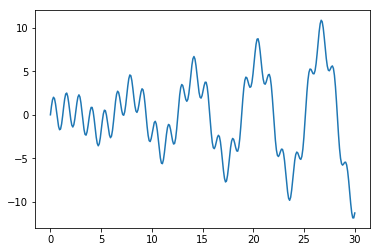

In [6]:
time=np.linspace(0., 30., 300)
target=time*np.sin(time)/3+2*np.sin(5*time)
plt.plot(time,target)

In [8]:
n_steps=20
n_inputs=1
n_neurons=100
n_outputs=1
tf.reset_default_graph()
X=tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y=tf.placeholder(tf.float32,[None,n_steps,n_outputs])
cell=tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,activation=tf.nn.relu),
    output_size=n_outputs)
outputs,states=tf.nn.dynamic_rnn(cell,X,dtype=tf.float32)

learning_rate=0.001
loss=tf.reduce_mean(tf.square(outputs-y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(loss)

init=tf.global_variables_initializer()


n_iterations=1500
batch_size=50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch,y_batch=[]
        sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
        if iteration % 100 == 0:
            mse=loss.eval(feed_dict={X:X_batch,y:y_batch})
            print("Iteration {} : MSE: {:4.2f}".format(iteration,mse))